In [22]:
#Load some packages to be used in this program
import matplotlib as plt
import scipy  as sp
import numpy  as np
import xarray as xr
import pyart  as pyart
import os
import glob
import cartopy.io.shapereader as shpreader
import cartopy.crs as ccrs
%pylab inline
import cartopy.io.shapereader as shpreader
import netCDF4  as netCDF4

Populating the interactive namespace from numpy and matplotlib


/home/sransom/.conda/envs/clouds_env/lib/python3.6/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['display', 'plt']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [118]:
from matplotlib.animation import FuncAnimation
#import matplotlib.animation as animation

In [2]:
#load sample data file for instructive usage
radar = pyart.io.read('/nfs/gce/projects/digr/xsapr_nsa/BRW190120002403.RAWTA32.maint')
rlon = -radar.longitude['data'][0]
rlat = radar.latitude['data'][0]

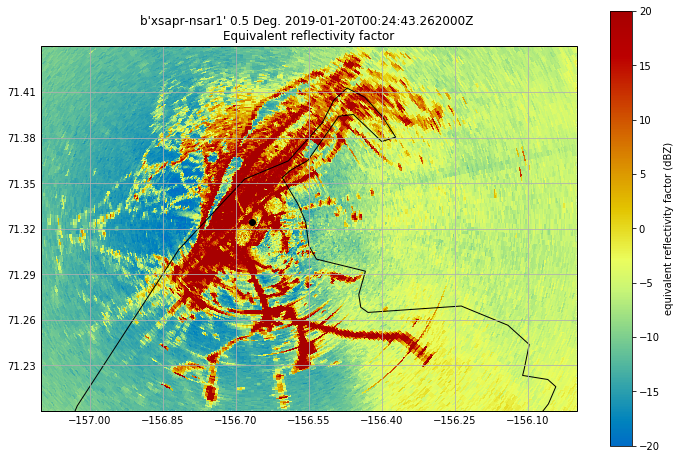

In [17]:
display    = pyart.graph.RadarMapDisplay(radar)
projection = ccrs.Mercator()#(central_latitude =radar.latitude ['data'][0],
                                   #central_longitude=radar.longitude['data'][0] )
fig        = plt.figure(figsize = (12,8))


# Plot data for one day
display.plot_ppi_map('total_power', 1, 
                     vmin = -20,
                     vmax =  20,
                     min_lon = -157.1, max_lon = -156,
                     min_lat =   71.2, max_lat =   71.44,
                     lon_lines = np.arange(-157.15,-155.95,.15),
                     lat_lines = np.arange(71.17, 71.47, .03),
                     resolution = '10m',
                     projection = projection,
                     # Add lines of lat and lon
                     lat_0=radar.latitude ['data'][0],
                     lon_0=radar.longitude['data'][0]
                    )
# Add point demarkating location of xsapr  site
display.plot_point(radar.longitude['data'][0], radar.latitude['data'][0], color = 'k')

plt.show()

/nfs/gce/projects/digr/xsapr_nsa/BRW190120000004.RAWTA30.maint
/nfs/gce/projects/digr/xsapr_nsa/BRW190120001204.RAWTA31.maint
/nfs/gce/projects/digr/xsapr_nsa/BRW190120002403.RAWTA32.maint
/nfs/gce/projects/digr/xsapr_nsa/BRW190120003603.RAWTA33.maint
/nfs/gce/projects/digr/xsapr_nsa/BRW190120004803.RAWTA34.maint
/nfs/gce/projects/digr/xsapr_nsa/BRW190120010003.RAWTA35.maint
/nfs/gce/projects/digr/xsapr_nsa/BRW190120011203.RAWTA36.maint
/nfs/gce/projects/digr/xsapr_nsa/BRW190120012404.RAWTA37.maint

In [3]:
# Read all files of
jan_20_evening = glob.glob('/nfs/gce/projects/digr/xsapr_nsa/BRW1901202*')
jan_20_evening.sort()
len(jan_20_evening)

20

In [122]:
#creating a radar animation using pyart and matplotlib functions

def animate(nframe):
    files = glob.glob('/nfs/gce/projects/digr/xsapr_nsa/BRW1901202*')
    files.sort()
    plt.clf()
    nfile = files[nframe]
    radar = pyart.io.read(nfile)
    display = pyart.graph.RadarMapDisplay(radar)
    projection = ccrs.Mercator()
    # Delete radar after use to save memory.
    #del radar
    display.plot_ppi_map('reflectivity', 1, 
                     vmin = -20,
                     vmax =  20,
                     min_lon = -157.1, max_lon = -156,
                     min_lat =   71.2, max_lat =   71.44,
                     lon_lines = np.arange(-157.15,-155.95,.15),
                     lat_lines = np.arange(71.17, 71.47, .03),
                     resolution = '10m',
                     projection = projection,
                     lat_0=radar.latitude ['data'][0],
                     lon_0=radar.longitude['data'][0])
    del radar

    #display.plot_point(-87.981810, 41.713969 , label_text='ANL', symbol='ko')
fig = plt.figure(figsize=(12, 8))

anim_klot = FuncAnimation(fig, animate, frames=len(jan_20_evening))
anim_klot.save('/home/sransom/pyth/reproducedGraphic.gif', writer = 'imagemagick', fps=2)
#plt.show()
plt.close()

In [ ]:
#make a nice time stamp
pacific = pytz.timezone('US/Alaska')
local_time = pacific.fromutc(time_at_start_of_radar)
fancy_date_string = local_time.strftime('%A %B %d at %I:%M %p %Z')
print(fancy_date_string)

#Give it a nice title
title = 'X-SAPR Utqiagvik \n' + fancy_date_string

In [123]:
#creating a more general radar animation using pyart and matplotlib functions

def animate(nframe, propiedad, minv, maxv):
    files = glob.glob('/nfs/gce/projects/digr/xsapr_nsa/BRW1901202*')
    files.sort()
    plt.clf()
    nfile = files[nframe]
    radar = pyart.io.read(nfile)
    title = title
    if propiedad == 'total_power':
        gatefilter = pyart.filters.GateFilter(radar)
        gatefilter.exclude_above(propiedad, 40)
        gatefilter.exclude_below(propiedad, 10)
    elif propiedad == 'reflectivity':
        gatefilter = pyart.filters.GateFilter(radar)
        gatefilter.exclude_above(propiedad, 20)
        gatefilter.exclude_below(propiedad, 0)
    elif propiedad == 'differential_reflectivity':
        gatefilter = pyart.filters.GateFilter(radar)
        gatefilter.exclude_above(propiedad, 1.5)
        gatefilter.exclude_below(propiedad, 0)
    else:
        gatefilter = None
    display = pyart.graph.RadarMapDisplay(radar)
    projection = ccrs.Mercator()
    display.plot_ppi_map(propiedad, 1, 
                     vmin = minv,
                     vmax = maxv,
    
                     resolution = '10m',
                     projection = projection,
                     gatefilter = gatefilter,
                     lat_0=radar.latitude ['data'][0],
                     lon_0=radar.longitude['data'][0])
    display.plot_point(radar.longitude['data'][0], radar.latitude['data'][0], color = 'k', label_text = 'X-sapr source')
    del radar

    #display.plot_point(-87.981810, 41.713969 , label_text='ANL', symbol='ko')
#fig = plt.figure(figsize=(12, 8))
#
#anim_klot = FuncAnimation(fig, animate, fargs = ('reflectivity',), frames=len(jan_20_evening))
#anim_klot.save('/home/sransom/pyth/EG_Utqiagvik_reflect.gif', writer = 'imagemagick', fps=2)
##plt.show()
#plt.close()

In [124]:
# files = glob.glob('/nfs/gce/projects/digr/xsapr_nsa/BRW1901202*')

In [196]:
radar.range['data']

array([     0.,    100.,    200., ...,  99800.,  99900., 100000.],
      dtype=float32)

In [125]:
# Now that we have a gif of reflectivity, consider some other properties, and plot them as well

vmin_ = (-30, -30, -15,  0, -1, -1, 0, 0, -10)
vmax_ = ( 50,  30,  15,  5,  8,  1, 1, 1, 160)

propnum = 0
for propiedad in radar.fields.keys():
    fig = plt.figure(figsize=(12, 8))
    vmin = vmin_[propnum]
    vmax = vmax_[propnum]
    propnum = propnum + 1
    anim_klot = FuncAnimation(fig, animate, fargs = (propiedad, vmin, vmax), frames=len(jan_20_evening))
    anim_klot.save('/home/sransom/pyth/EG_Utqiagvik_' + propiedad +'.gif', writer = 'imagemagick', fps=2)
    print('fig ' + str(propnum) + ' printed')
    #plt.show()
    plt.close()


fig 1 printed
fig 2 printed
fig 3 printed
fig 4 printed
fig 5 printed
fig 6 printed
fig 7 printed
fig 8 printed
fig 9 printed


Next we will grid the data:

In [3]:
from geopy.distance import geodesic as gdist

In [ ]:
# Define the extent in meters north and east of the xsapr radar to which you wish the grid to interpret
lat_extent = gdist((rlat,-rlon),(71.44, -rlon)).meters
lon_extent = gdist((rlat,-rlon),(rlat,-157.1)).meters

In [ ]:
print(lat_extent)
print(lon_extent)

In [3]:
gatefilter = pyart.filters.GateFilter(radar)
gatefilter.exclude_above('total_power', 40)
gatefilter.exclude_below('total_power', 10)

In [4]:
grid = pyart.map.grid_from_radars((radar,),
                                  (16,2000,2000), ((0,15000),(-20000, 20000), (-20000, 20000)),#(-lat_extent, lat_extent), (-lon_extent,lon_extent)),
                                  fields = ['total_power'], weighting_function = 'Barnes2',
                                  gatefilter = (gatefilter,),
                                  gridding_algo='map_gates_to_grid')

grid_path = '/home/sransom/pyth/grid_eg.nc'

grid.write(grid_path)

del grid


radurr = pyart.io.read_grid(grid_path)

In [19]:
dir(radurr)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_find_and_check_nradar',
 'add_field',
 'fields',
 'get_point_longitude_latitude',
 'get_projparams',
 'init_point_altitude',
 'init_point_longitude_latitude',
 'init_point_x_y_z',
 'metadata',
 'nradar',
 'nx',
 'ny',
 'nz',
 'origin_altitude',
 'origin_latitude',
 'origin_longitude',
 'point_altitude',
 'point_latitude',
 'point_longitude',
 'point_x',
 'point_y',
 'point_z',
 'projection',
 'projection_proj',
 'radar_altitude',
 'radar_latitude',
 'radar_longitude',
 'radar_name',
 'radar_time',
 'time',
 'to_xarray',
 'write',
 'x',
 'y',
 'z']

In [21]:
radurr.radar_time['data']

masked_array(data=[0.267],
             mask=False,
       fill_value=1e+20)

In [23]:
lon, lat = radurr.get_point_longitude_latitude()
height = radurr.point_z['data'][:,0,0]
time = np.array([ netCDF4.num2date(radurr.time['data'][0], radurr.time['units'])])

In [ ]:
ds = xarray.Dataset()
def gridmake(ds, field, lon, lat, height, time):
   this_data = radurr.fields[field]['data']
   this_data = np.ma.filled(this_data, np.nan)
   my_data = xarray.DataArray(np.expand_dims(this_data,0),
                              dims = ('time', 'z', 'y', 'x'),
                              coords = {'time' : (['time'], time),
                                        'z' : (['z'], height),
                                        'lat' :(['y','x'], lat),
                                        'lon' : (['y','x'],lon),
                                         'y' : (['y'],lat[:,0]),
                                         'x' : (['x'],lon[0,:])})
    for this_meta in list(radurr.fields[field].keys()):
       if this_meta is not 'data':
           my_data.attrs.update({this_meta: radurr.fields[field][this_meta]})    ds[field] = my_data
   ds.lon.attrs = [('long_name', 'longitude of grid cell center'),
            ('units', 'degrees_east')]
   ds.lat.attrs = [('long_name', 'latitude of grid cell center'),
            ('units', 'degrees_north')]
   ds.z.attrs['long_name'] = "height above sea sea level"
   ds.z.attrs['units'] = "m"    ds.z.encoding['_FillValue'] = -9999.0
   ds.lat.encoding['_FillValue'] = -9999.0
   ds.lon.encoding['_FillValue'] = -9999.0
   return ds

    
#for this_field in list(radurr.fields.keys()):



In [19]:
radar.fields['total_power']['data'].min()

-27.11

In [27]:
ccrs.Mercator.domain.__doc__

In [5]:
shpfilename = shpreader.natural_earth(resolution='10m',
                                      category='cultural',
                                      name='admin_1_states_provinces')

/home/sransom/.conda/envs/clouds_env/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:4759: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if fix_wrap_around and itemindex:


AttributeError: 'GeoAxesSubplot' object has no attribute 'read_shapefile'

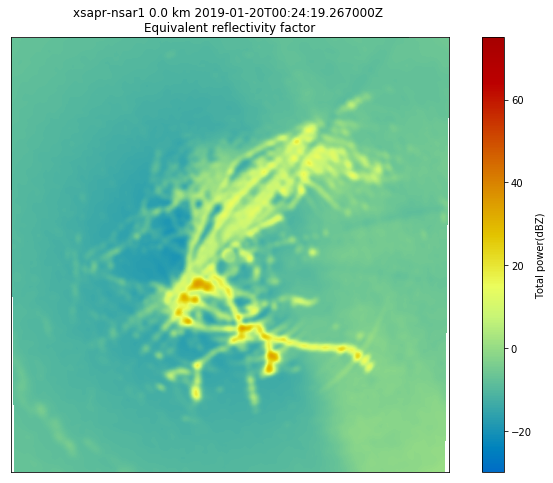

In [10]:
# create the plot
display = pyart.graph.GridMapDisplayBasemap(radurr)

fig = plt.figure(figsize = [12, 8])

min_lon = -157.1
max_lon = -156,
min_lat =  71.2
max_lat = 71.44,
lon_lines = np.arange(-157.15,-155.95,.15)
lat_lines = np.arange(71.17, 71.5, .03)

#display.plot_grid('total_power', #fig=fig,
                  #lat_lines=lat_lines,
                  #lon_lines=lon_lines,
                  #projection = ccrs.Mercator()
                 )

display.plot_basemap(lat_lines=lat_lines, lon_lines=lon_lines,
                     auto_range = True)


#my_ax = fig.add_subplot(111,projection = ccrs.Mercator())

my_ax.read_shapefile('shpfilename')




#display.plot_basemap(lat_lines=lat_lines, lon_lines=lon_lines,
#                     min_lon=min_lon, max_lon=max_lon,
#                     min_lat=min_lat, max_lat=max_lat)

#
##
##ax = plt.axes(projection = projection)
#ax = fig.add_subplot(111)
#ax.imshow(grid.fields['total_power']['data'], origin='lower')
#plt.show()
#plt.close()

In [26]:
print(fig.add_subplot.__doc__)

Add an `~.axes.Axes` to the figure as part of a subplot arrangement.

Call signatures::

   add_subplot(nrows, ncols, index, **kwargs)
   add_subplot(pos, **kwargs)
   add_subplot(ax)
   add_subplot()

Parameters
----------
*args
    Either a 3-digit integer or three separate integers
    describing the position of the subplot. If the three
    integers are *nrows*, *ncols*, and *index* in order, the
    subplot will take the *index* position on a grid with *nrows*
    rows and *ncols* columns. *index* starts at 1 in the upper left
    corner and increases to the right.

    *pos* is a three digit integer, where the first digit is the
    number of rows, the second the number of columns, and the third
    the index of the subplot. i.e. fig.add_subplot(235) is the same as
    fig.add_subplot(2, 3, 5). Note that all integers must be less than
    10 for this form to work.

    If no positional arguments are passed, defaults to (1, 1, 1).

    In rare circumstances, `.add_subplot` may be 

In [13]:
grid = pyart.map.grid_from_radars((radar,),
                                  (16,2000,2000), ((0,15000),(-20000, 20000), (-20000, 20000)),#(-lat_extent, lat_extent), (-lon_extent,lon_extent)),
                                  fields = ['total_power'], weighting_function = 'Barnes2',
                                  gatefilter = (gatefilter,),
                                  gridding_algo='map_gates_to_grid')

grid_path = '/home/sransom/pyth/grid_eg.nc'

grid.write(grid_path)

del grid


radurr = pyart.io.read_grid(grid_path)

In [15]:
np.ma.masked

masked

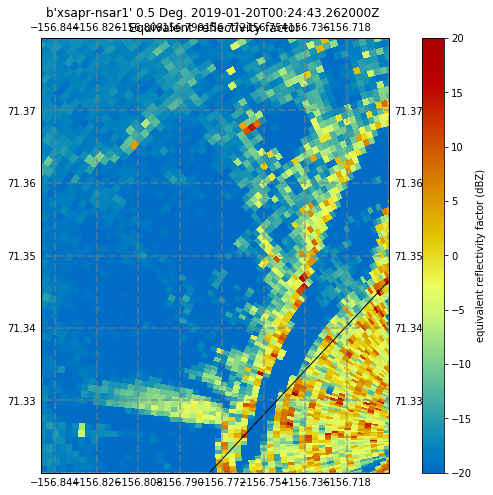

In [16]:



display    = pyart.graph.RadarMapDisplay(radar)
projection = ccrs.Mercator(central_longitude=rlon,
                           min_latitude=rlat-5.,
                           max_latitude=rlat+5.)
fig        = plt.figure(figsize = (12,8))


# Plot data for one day
display.plot_ppi_map('reflectivity', 1, 
                     vmin = -20,
                     vmax =  20,
                     min_lon = -156.85, max_lon = -156.7,
                     min_lat =  71.32, max_lat =  71.38,
                     resolution = '10m',
                     projection = projection,
                     # Add lines of lat and lon
                     lat_0=radar.latitude ['data'][0],
                     lon_0=radar.longitude['data'][0]
                    )
display.ax.gridlines(draw_labels=True, linewidth=2, color='gray', alpha=0.5, linestyle='--')
# Add point demarkating location of xsapr  site
display.plot_point(radar.longitude['data'][0], radar.latitude['data'][0], color = 'k')

plt.show()

In [ ]:
dir(radar)
# ang1 = sample.fixed_angle['data'][0]

In [ ]:
# Create gate filter that isolates velocities characteristic of sea ice

gatefilter = pyart.filters.GateFilter(radar)
gatefilter.exclude_above('total_power', 40)
gatefilter.exclude_below('total_power', 20)


In [ ]:
anim_klot = FuncAnimation(fig, animate, fargs = ('total_power', vmin, vmax,), frames=len(jan_20_evening))
    anim_klot.save('/home/sransom/pyth/gatefilter_eg.gif', writer = 'imagemagick', fps=2)
    #plt.show()
    plt.close()

In [ ]:
files.sort()
files

# Create empty list of images to serve as frames in the animation
ims = []

# save some vars to inneccessitate them from being redefined during each iteration of a for loop
radar = pa.io.read(jan_20_evening[0])
lat_0=radar.latitude ['data'][0]
lon_0=radar.longitude['data'][0]

fig        = plt.figure(figsize = (12,8))

#for i in range(len(jan_20_evening)):
for i in range(2):

    
    # Create figure 
#    fig        = plt.figure(figsize = (12,8))
    
        radar      = pa.io.read(jan_20_evening[i])
        display    = pa.graph.RadarMapDisplay(radar)
    
    #Delete radar to save memory
    del radar
    
    projection = ccrs.Mercator()
    
    # Plot data for one day
    display.plot_ppi_map('reflectivity', 1, 
                     vmin = -20,
                     vmax =  20,
                     min_lon = -157.1, max_lon = -156,
                     min_lat =   71.2, max_lat =   71.44,
                     lon_lines = np.arange(-157.15,-155.95,.15),
                     lat_lines = np.arange(71.17, 71.47, .03),
                     resolution = '10m',
                     projection = projection,
                     # Add lines of lat and lon
                     lat_0=lat_0,
                     lon_0=lon_0
                    )
    # Add point demarkating location of xsapr  site
    display.plot_point(lon_0, lat_0, color = 'k')
    
    ims.append(im)
    plt.close()

ani = animation.FuncAnimation(fig,ims,interval = 50, blit = True, repeat_delay = 0)

plt.show()